In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# 1. Carregando os dados
(X_treinamento, _), (X_teste, _) = cifar10.load_data()
X_treinamento = X_treinamento.astype('float32') / 255.
X_teste = X_teste.astype('float32') / 255.

# 2. Definindo o modelo com API funcional
entrada = Input(shape=(32, 32, 3)) # Entrada da imagem (32x32x3 para CIFAR-10)

# --- ENCODER ---
x = Conv2D(32, (3, 3), activation='relu', padding='same')(entrada)     # 32x32x32
x = MaxPooling2D((2, 2), padding='same')(x)                             # 16x16x32

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)           # 16x16x64
x = MaxPooling2D((2, 2), padding='same')(x)                             # 8x8x64

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)          # 8x8x128
codificado = MaxPooling2D((2, 2), padding='same')(x)                   # 4x4x128

# --- DECODER ---
x = Conv2D(128, (3, 3), activation='relu', padding='same')(codificado)  # 4x4x128
x = UpSampling2D((2, 2))(x)                                             # 8x8x128

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)            # 8x8x64
x = UpSampling2D((2, 2))(x)                                             # 16x16x64

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)            # 16x16x32
x = UpSampling2D((2, 2))(x)                                             # 32x32x32

decodificado = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # 32x32x3

# 3. Modelos
autoencoder = Model(entrada, decodificado)
encoder = Model(entrada, codificado)

autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy']) # melhor para imagens coloridas, entropia cruzada é pra escala de cinza
historico = autoencoder.fit(X_treinamento, X_treinamento, epochs=100, batch_size=256, validation_data=(X_teste, X_teste))

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 82ms/step - accuracy: 0.5044 - loss: 0.0359 - val_accuracy: 0.6904 - val_loss: 0.0128
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.7116 - loss: 0.0123 - val_accuracy: 0.7448 - val_loss: 0.0109
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step - accuracy: 0.7391 - loss: 0.0104 - val_accuracy: 0.7491 - val_loss: 0.0093
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.7521 - loss: 0.0093 - val_accuracy: 0.7648 - val_loss: 0.0086
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.7533 - loss: 0.0088 - val_accuracy: 0.7602 - val_loss: 0.0079
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.7590 - loss: 0.0079 - val_accuracy: 0.7501 - val_loss: 0.0075
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.7578 - loss: 0.0073 - val_accuracy: 0.7711 - val_loss: 0.0068
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.7586 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


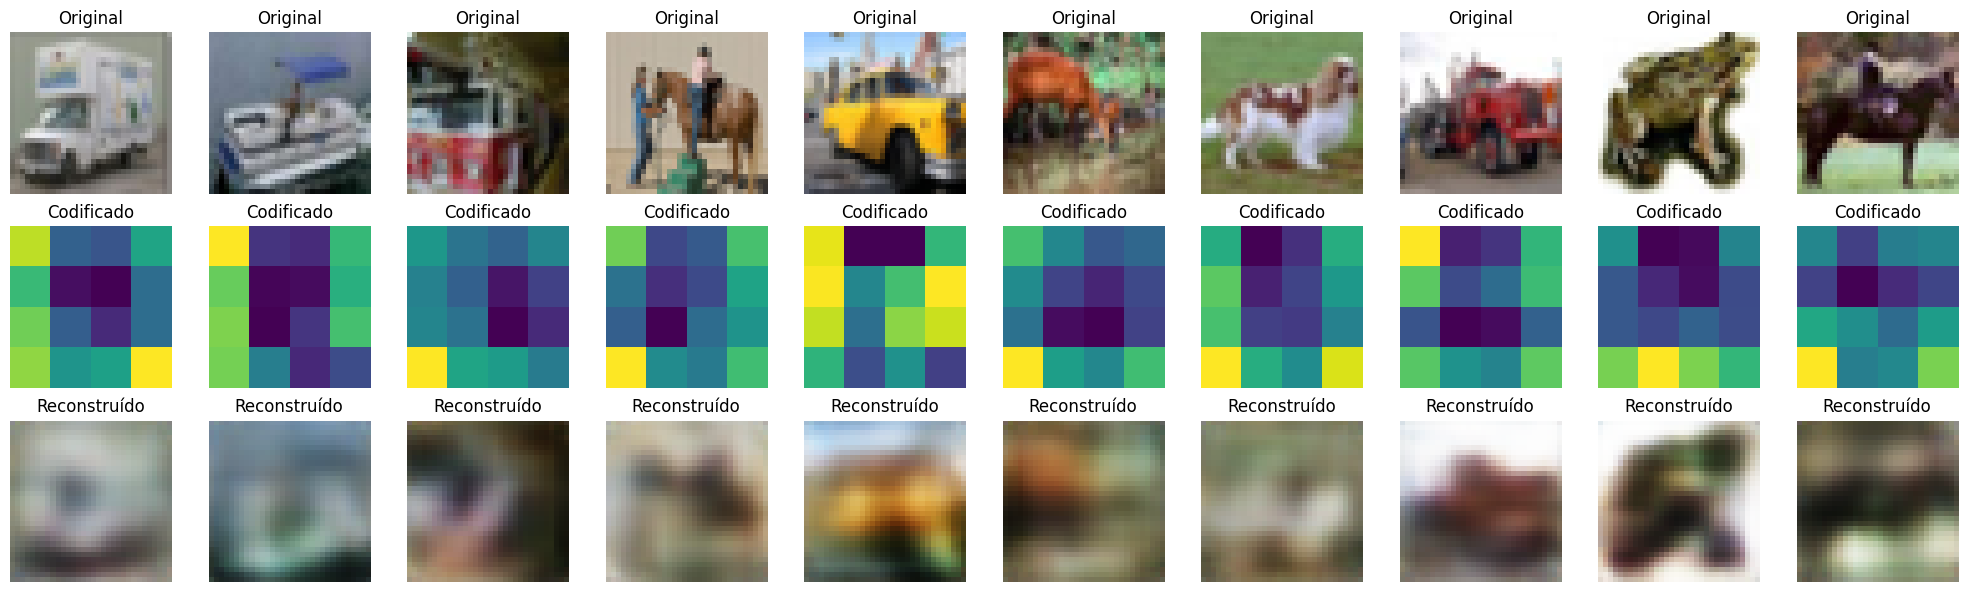

In [ ]:
# Gerando imagens codificadas e decodificadas
imagens_codificadas = encoder.predict(X_teste)
imagens_decodificadas = autoencoder.predict(X_teste)

# Visualizar 10 imagens
numero_imagens = 10
indices = np.random.randint(X_teste.shape[0], size=numero_imagens)

plt.figure(figsize=(20, 6))
for i, idx in enumerate(indices):
    # Original
    plt.subplot(3, numero_imagens, i + 1)
    plt.imshow(X_teste[idx])
    plt.title("Original")
    plt.axis('off')

    # Codificado
    plt.subplot(3, numero_imagens, i + 1 + numero_imagens)
    cod = imagens_codificadas[idx]
    plt.imshow(np.mean(cod, axis=-1), cmap='viridis')  # média dos canais
    plt.title("Codificado")
    plt.axis('off')

    # Reconstruído
    plt.subplot(3, numero_imagens, i + 1 + 2*numero_imagens)
    plt.imshow(imagens_decodificadas[idx])
    plt.title("Reconstruído")
    plt.axis('off')

plt.tight_layout()
plt.show()

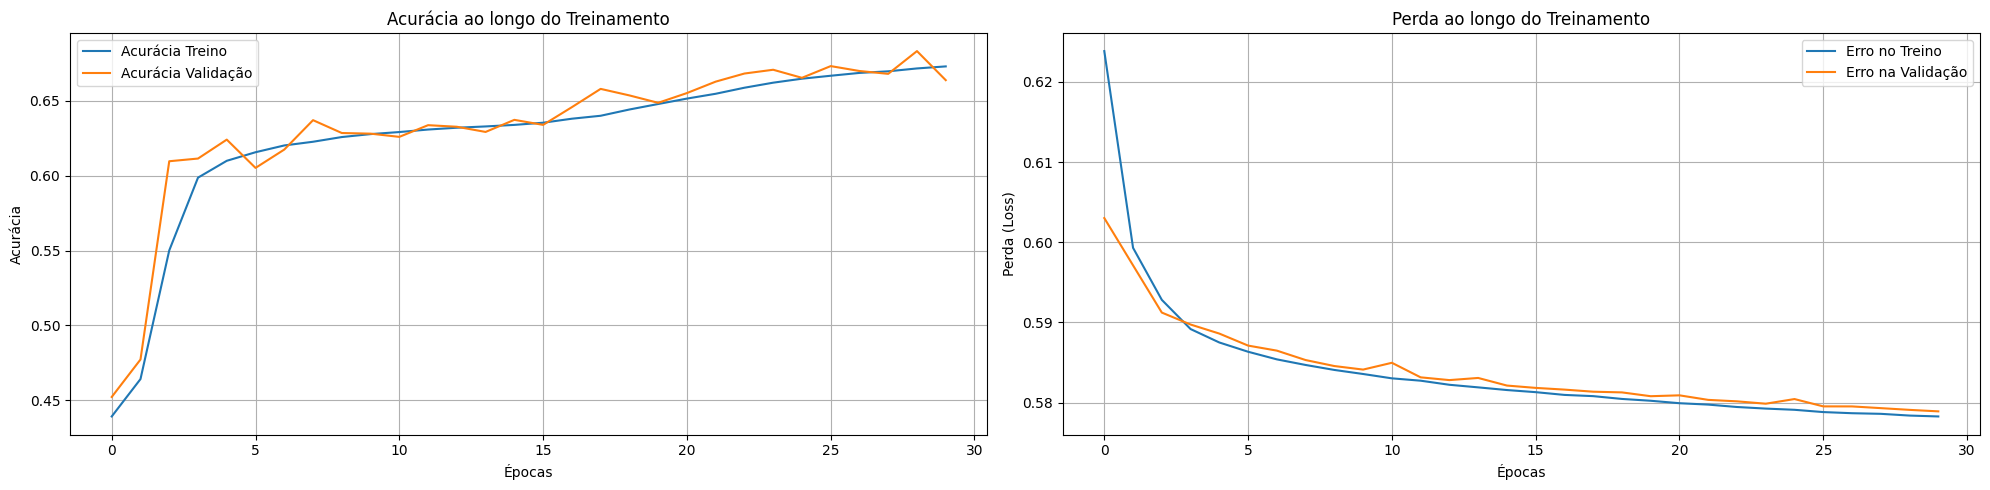

In [38]:
# Criar figura com 2 subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# --- Gráfico da Acurácia ---
axs[0].plot(historico.history['accuracy'], label='Acurácia Treino')
axs[0].plot(historico.history['val_accuracy'], label='Acurácia Validação')
axs[0].set_title('Acurácia ao longo do Treinamento')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Acurácia')
axs[0].legend()
axs[0].grid(True)

# --- Gráfico da Perda ---
axs[1].plot(historico.history['loss'], label='Erro no Treino')
axs[1].plot(historico.history['val_loss'], label='Erro na Validação')
axs[1].set_title('Perda ao longo do Treinamento')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Perda (Loss)')
axs[1].legend()
axs[1].grid(True)

# Ajustar o layout para não sobrepor
plt.tight_layout()
plt.show()

In [1]:
# Previsões diretamente com os arrays
y_prob = autoencoder.predict(X_teste)
y_pred = np.argmax(y_prob, axis=1)  # classe prevista
y_true = np.argmax(X_teste, axis=1)  # classe verdadeira

# Relatório
classes_cifar10 = [
    'avião',        # 0
    'automóvel',    # 1
    'pássaro',      # 2
    'gato',         # 3
    'veado',        # 4
    'cachorro',     # 5
    'sapo',         # 6
    'cavalo',       # 7
    'navio',        # 8
    'caminhão'      # 9
]
relatorio_dict = classification_report(y_true, y_pred, output_dict=True, target_names=classes_cifar10)
relatorio_df = pd.DataFrame(relatorio_dict).T

# Converter para %
for coluna in ['precision', 'recall', 'f1-score']:
    relatorio_df[coluna] *= 100

relatorio_df = relatorio_df.round(5)
relatorio_df = relatorio_df[['precision', 'recall', 'f1-score', 'support']]
relatorio_df.columns = ['Precisão (%)', 'Revocação (%)', 'F1-Score (%)', 'Suporte']

# Exibir bonito
espaco = 14
print("\n" + "Relatório de Classificação (em porcentagem):".center(espaco * 5))
print("-" * (espaco * 5))
print(f"{'Classe':<{espaco}}{'Precisão (%)':>{espaco}}{'Recall (%)':>{espaco}}{'F1-Score (%)':>{espaco}}{'Suporte':>{espaco}}")
print("-" * (espaco * 5))
for idx, row in relatorio_df.iterrows():
    print(f"{idx:<{espaco}}{row['Precisão (%)']:>{espaco}.5f}{row['Revocação (%)']:>{espaco}.5f}{row['F1-Score (%)']:>{espaco}.5f}{row['Suporte']:>{espaco}.0f}")
print("-" * (espaco * 5))

NameError: name 'autoencoder' is not defined

In [2]:
imagens_codificadas = encoder.predict(X_teste)
imagens_decodificadas = autoencoder.predict(X_teste)

numero_imagens = 10
imagens_teste = np.random.randint(X_teste.shape[0], size=numero_imagens)
plt.figure(figsize=(32,32))
for i, indice_imagem in enumerate(imagens_teste):
    # imagem original
    eixo = plt.subplot(10, 10, i + 1)
    plt.imshow(X_teste[indice_imagem])
    plt.xticks(())
    plt.yticks(())

    # imagem codificada
    eixo = plt.subplot(10, 10, i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(16, 8))
    plt.xticks(())
    plt.yticks(())

     # imagem reconstruída
    eixo = plt.subplot(10, 10, i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem])
    plt.xticks(())
    plt.yticks(())

NameError: name 'encoder' is not defined